## Datasets

机器学习是数据驱动的方法，因此数据在算法的编写、测试环节起到非常重要的作用。下面列出了一些比较常用的数据，可以比较方便的来测试无监督、监督算法等。

## Moons


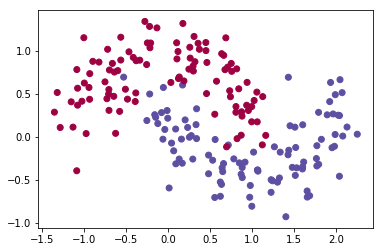

In [3]:
% matplotlib inline
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# generate sample data
np.random.seed(0)
X, y = datasets.make_moons(200, noise=0.20)

# plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()

## XOR

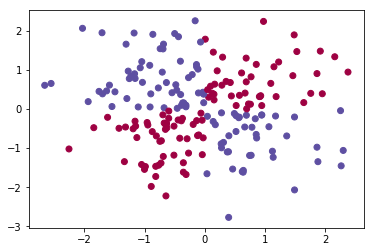

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessClassifier

rng = np.random.RandomState(0)
X = rng.randn(200, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# plot data
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.show()

## Digital 

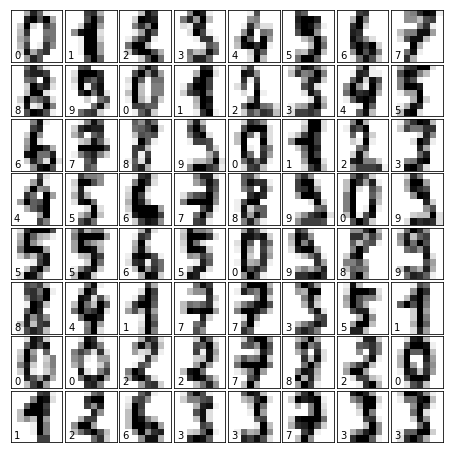

In [7]:
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits

# load data
digits = load_digits()

# copied from notebook 02_sklearn_data.ipynb
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary)
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

## Iris

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.


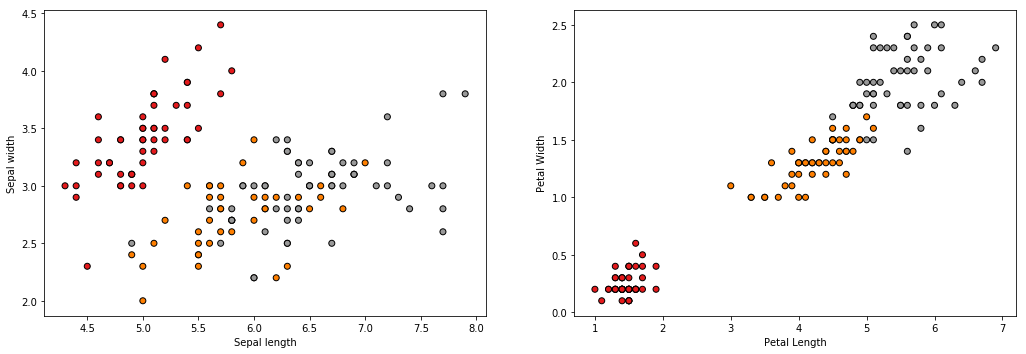

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :]  
y = iris.target

# Plot the samples
plt.figure(figsize=(15, 5))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

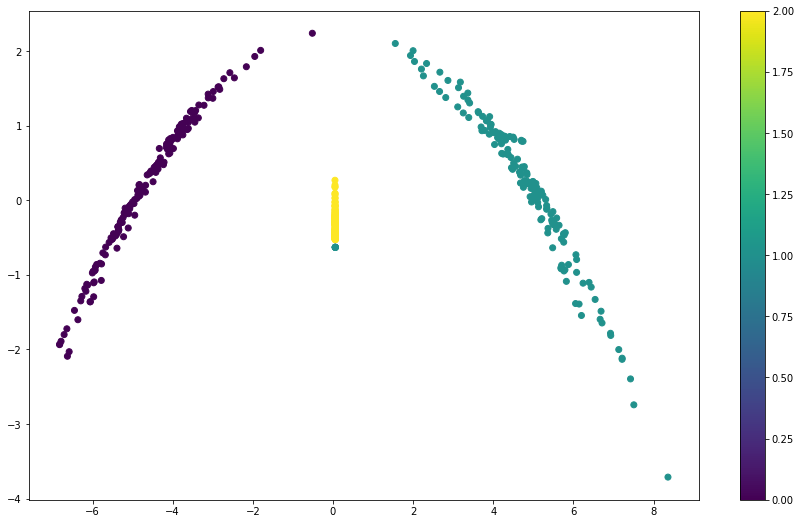

In [21]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors=5, n_components=2)
proj = iso.fit_transform(X)

plt.figure(figsize=(15, 9))
plt.scatter(proj[:, 0], proj[:, 1], c=y)
plt.colorbar()
plt.show()

## blobs


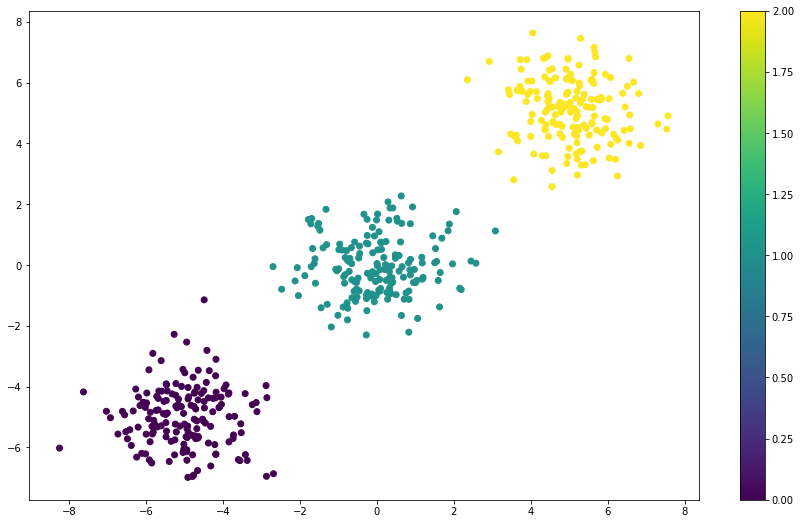

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobsb

# Generate 3 blobs with 2 classes where the second blob contains
# half positive samples and half negative samples. Probability in this
# blob is therefore 0.5.
centers = [(-5, -5), (0, 0), (5, 5)]
n_samples = 500

X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

plt.figure(figsize=(15, 9))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.colorbar()
plt.show()

## Circles

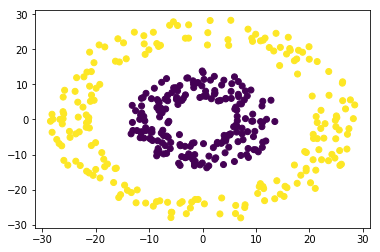

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

n = 200

t1 = (np.random.rand(n, 1)*2-1)*np.pi
r1 = 10 + (np.random.rand(n, 1)*2-1)*4
x_1 = np.concatenate((r1 * np.cos(t1), r1 * np.sin(t1)), axis=1)
y_1 = [0 for _ in range(n)]

t2 = (np.random.rand(n, 1)*2-1)*np.pi
r2 = 25 + (np.random.rand(n, 1)*2-1)*4
x_2 = np.concatenate((r2 * np.cos(t2), r2 * np.sin(t2)), axis=1)
y_2 = [1 for _ in range(n)]

x = np.concatenate((x_1, x_2), axis=0)
y = np.concatenate((y_1, y_2), axis=0)

plt.scatter(x[:, 0], x[:,1], c=y)
plt.show()

yy = y.reshape(-1, 1)
data = np.concatenate((x, yy), axis=1)
np.savetxt("dataset_circles.csv", data, delimiter=",")

## CIFAR-10数据

CIFAR-10[^3]是一个常用的彩色图片数据集，它有10个类别: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'。每张图片都是$3\times32\times32$，也即3-通道彩色图片，分辨率为$32\times32$。

[^3]: http://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage() # 可以把Tensor转成Image，方便可视化

In [ ]:
# 第一次运行程序torchvision会自动下载CIFAR-10数据集，
# 大约100M，需花费一定的时间，
# 如果已经下载有CIFAR-10，可通过root参数指定

# 定义对数据的预处理
transform = transforms.Compose([
        transforms.ToTensor(), # 转为Tensor
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # 归一化
                             ])

# 训练集
trainset = tv.datasets.CIFAR10(
                    root='../data/', 
                    train=True, 
                    download=True,
                    transform=transform)

trainloader = t.utils.data.DataLoader(
                    trainset, 
                    batch_size=4,
                    shuffle=True, 
                    num_workers=2)

# 测试集
testset = tv.datasets.CIFAR10(
                    '../data/',
                    train=False, 
                    download=True, 
                    transform=transform)

testloader = t.utils.data.DataLoader(
                    testset,
                    batch_size=4, 
                    shuffle=False,
                    num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')